In [5]:
import json
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd
import io

import warnings
warnings.filterwarnings('ignore')

In [6]:
file_ = io.TextIOWrapper(open('lesson_4.json', 'rb'), 'windows-1251')

In [7]:
df = pd.read_json(file_)
df.head(2)

,global_id,ID,TypeObject,NameOwner,OnTerritoryOfMoscow,AdmArea,District,Location,Longitude_WGS84,Latitude_WGS84,StationInfo,geoData,geodata_center
0,1031191969,71,здание/сооружение,Государственное бюджетное профессиональное обр...,да,Центральный административный округ,район Замоскворечье,"город Москва, Пятницкая улица, дом 46, строение 3",37.627300,55.736850,"[{'BaseStation': '4039', 'Operator': 'ПАО «Вым...","{'coordinates': [37.6273, 55.73685], 'type': '...","{'type': 'geometry', 'value': '0101000000F163C..."
1,1031191971,73,здание/сооружение,Государственное бюджетное учреждение здравоохр...,да,Центральный административный округ,Пресненский район,"город Москва, Садовая-Кудринская улица, дом 15...",37.584398,55.765119,"[{'BaseStation': '28', 'Operator': 'ПАО «Мобил...","{'coordinates': [37.584398, 55.765119], 'type'...","{'type': 'geometry', 'value': '010100000085ECB..."


In [8]:
df["Operator"] = df.apply(lambda row: row["StationInfo"][0]["Operator"], axis = 1)
df["Base_station"] = df.apply(lambda row: row["StationInfo"][0]["BaseStation"], axis = 1)

del df["ID"]
del df["OnTerritoryOfMoscow"]
del df["StationInfo"]
del df["geoData"]
del df["geodata_center"]

df.rename(columns={"Longitude_WGS84": "Longitude", "Latitude_WGS84": "Latitude"}, inplace = True)

In [9]:
df["AdmArea"].fillna("NA", inplace = True)
df["District"].fillna("NA", inplace = True)

In [10]:
df["Operator"] = df["Operator"].map({'ANT': 0, 'ООО «Антарес»': 1, 'ООО «Т2 Мобайл»': 2, 'ПАО «ВымпелКом»': 3, 'ПАО «МегаФон»': 4, 'ПАО «Мобильные ТелеСистемы»': 5 })

Text(0.5, 1.0, 'ООО «Т2 Мобайл»')

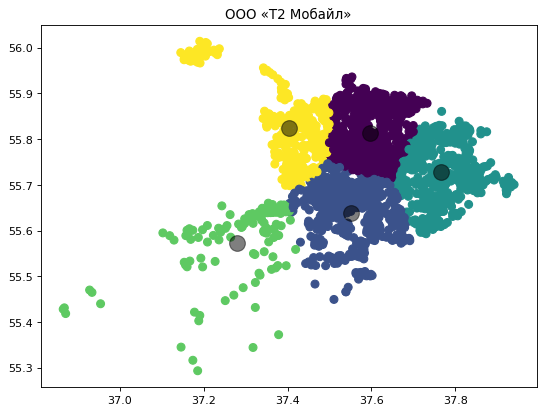

In [11]:
df_operator = df[df["Operator"] == 2]

coordinates = np.array([[row['Longitude'], row['Latitude']] for index, row in df_operator.iterrows()])

kmeans = KMeans(n_clusters=5)
kmeans.fit(coordinates)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=kmeans.predict(coordinates), s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("ООО «Т2 Мобайл»")

In [12]:
set(df["TypeObject"])

{'здание/сооружение',
 'иной объект, находящийся в имущественной казне города Москвы',
 'опора двойного назначения'}

In [13]:
TypeObject = {"здание/сооружение": 1, "иной объект, находящийся в имущественной казне города Москвы": 2, "опора двойного назначения":3 }

Text(0.5, 1.0, 'ООО «Т2 Мобайл»')

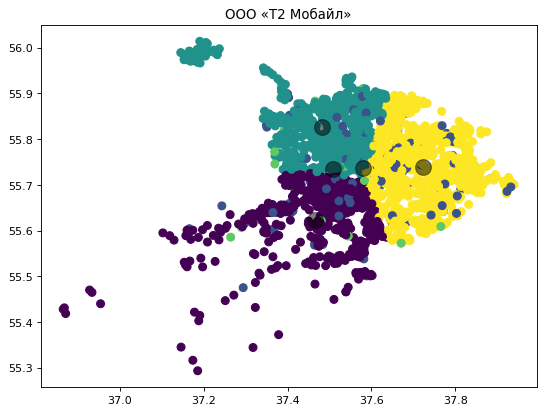

In [14]:
df_operator = df[df["Operator"] == 2]
df_operator["TypeObject_1"] = df_operator["TypeObject"].map(TypeObject)

coordinates = np.array([[row['Longitude'], row['Latitude'], row["TypeObject_1"]] for index, row in df_operator.iterrows()])

kmeans = KMeans(n_clusters=5)
kmeans.fit(coordinates)

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=kmeans.predict(coordinates), s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("ООО «Т2 Мобайл»")